# Load Data into Spark

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("NBA-Player-Analysis").getOrCreate()

25/04/16 21:21:10 WARN Utils: Your hostname, victus resolves to a loopback address: 127.0.1.1; using 10.1.216.114 instead (on interface wlo1)
25/04/16 21:21:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/16 21:21:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
data = spark.read.csv("stats.csv", header=True, inferSchema=True)

data.head(10)

25/04/16 21:21:18 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(SNo=1, Player='Shai Gilgeous-Alexander', Team='OKC', Age=26, GP=76, W=63, L=13, Min=34.2, PTS=32.7, FGM=11.3, FGA=21.8, FG%=51.9, 3PM=2.1, 3PA=5.7, 3P%=37.5, FTM=7.9, FTA=8.8, FT%=89.8, OREB=0.9, DREB=4.1, REB=5.0, AST=6.4, TOV=2.4, STL=1.7, BLK=1.0, PF=2.2, FP=54.1, DD2=6.0, TD3=0.0, +/-=12.1),
 Row(SNo=2, Player='Giannis Antetokounmpo', Team='MIL', Age=30, GP=67, W=40, L=27, Min=34.2, PTS=30.4, FGM=11.8, FGA=19.7, FG%=60.1, 3PM=0.2, 3PA=0.9, 3P%=22.2, FTM=6.5, FTA=10.6, FT%=61.7, OREB=2.2, DREB=9.7, REB=11.9, AST=6.5, TOV=3.1, STL=0.9, BLK=1.2, PF=2.3, FP=57.4, DD2=55.0, TD3=11.0, +/-=5.0),
 Row(SNo=3, Player='Nikola Jokić', Team='DEN', Age=30, GP=70, W=46, L=24, Min=36.7, PTS=29.6, FGM=11.2, FGA=19.5, FG%=57.6, 3PM=2.0, 3PA=4.7, 3P%=41.7, FTM=5.2, FTA=6.4, FT%=80.0, OREB=2.9, DREB=9.9, REB=12.7, AST=10.2, TOV=3.3, STL=1.8, BLK=0.6, PF=2.3, FP=64.3, DD2=59.0, TD3=34.0, +/-=8.5),
 Row(SNo=4, Player='Luka Dončić', Team='LAL', Age=26, GP=50, W=31, L=19, Min=35.4, PTS=28.2, FGM=9.2,

In [3]:
spark.sql("""CREATE TEMPORARY VIEW nba
USING csv 
OPTIONS (
  path 'stats.csv',
  header true
);""")

DataFrame[]

In [4]:
spark.sql("SELECT * FROM NBA").show()

+---+--------------------+----+---+---+---+---+----+----+----+----+----+---+----+----+---+----+----+----+----+----+----+---+---+---+---+----+----+----+----+
|SNo|              Player|Team|Age| GP|  W|  L| Min| PTS| FGM| FGA| FG%|3PM| 3PA| 3P%|FTM| FTA| FT%|OREB|DREB| REB| AST|TOV|STL|BLK| PF|  FP| DD2| TD3| +/-|
+---+--------------------+----+---+---+---+---+----+----+----+----+----+---+----+----+---+----+----+----+----+----+----+---+---+---+---+----+----+----+----+
|  1|Shai Gilgeous-Ale...| OKC| 26| 76| 63| 13|34.2|32.7|11.3|21.8|51.9|2.1| 5.7|37.5|7.9| 8.8|89.8| 0.9| 4.1| 5.0| 6.4|2.4|1.7|1.0|2.2|54.1| 6.0| 0.0|12.1|
|  2|Giannis Antetokou...| MIL| 30| 67| 40| 27|34.2|30.4|11.8|19.7|60.1|0.2| 0.9|22.2|6.5|10.6|61.7| 2.2| 9.7|11.9| 6.5|3.1|0.9|1.2|2.3|57.4|55.0|11.0| 5.0|
|  3|        Nikola Jokić| DEN| 30| 70| 46| 24|36.7|29.6|11.2|19.5|57.6|2.0| 4.7|41.7|5.2| 6.4|80.0| 2.9| 9.9|12.7|10.2|3.3|1.8|0.6|2.3|64.3|59.0|34.0| 8.5|
|  4|         Luka Dončić| LAL| 26| 50| 31| 19|35.4|28.2| 

# Data Analysis

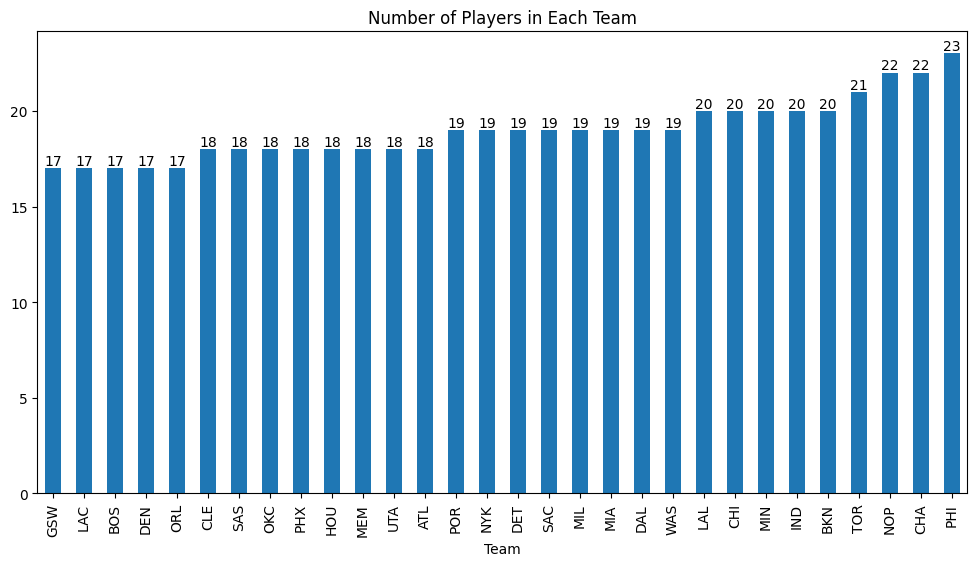

In [5]:
teams = data.groupBy("Team").count()

teamsdf = teams.toPandas().sort_values(by='count')

ax = teamsdf.plot.bar(x='Team', y='count', figsize=(12, 6), legend=False, title="Number of Players in Each Team")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

### Find the best offensive player

In [6]:
data = data.withColumn("off_rating", expr("PTS * FGM * AST"))

off_rating = data.filter(col("GP") >= 65).select("Player","off_rating").toPandas().sort_values(by="off_rating",ascending=False)

off_rating.head(10)

,Player,off_rating
2,Nikola Jokić,3381.504
0,Shai Gilgeous-Alexander,2364.864
1,Giannis Antetokounmpo,2331.680
5,Cade Cunningham,2327.598
11,Trae Young,2077.328
10,LeBron James,1860.744
6,Jalen Brunson,1708.200
7,Devin Booker,1581.312
4,Jayson Tatum,1479.360
15,James Harden,1329.012


### Find the best defensive player

In [7]:
data = data.withColumn("def_rating", expr("STL * BLK * DREB / PF"))

def_rating = data.filter(col("GP") >= 65).select("Player","def_rating").toPandas().sort_values(by="def_rating",ascending=False)

def_rating.head(10)

,Player,def_rating
34,Evan Mobley,5.040000
26,Scottie Barnes,4.941176
2,Nikola Jokić,4.648696
1,Giannis Antetokounmpo,4.554783
56,Amen Thompson,4.095000
55,Dyson Daniels,3.926087
61,Jarrett Allen,3.834000
47,Myles Turner,3.392000
43,Ivica Zubac,3.263333
76,Rudy Gobert,3.225600


### Best contributing player

In [39]:
data = data.withColumn("contribution", expr("GP * MIN * FGM"))

contributions = data.select("Player","contribution").toPandas().sort_values(by="contribution",ascending=False)

contributions.head(10)

,Player,contribution
0,Shai Gilgeous-Alexander,29370.96
2,Nikola Jokić,28772.80
1,Giannis Antetokounmpo,27038.52
4,Anthony Edwards,26096.07
11,Devin Booker,24338.25
5,Jayson Tatum,24111.36
8,Cade Cunningham,24010.00
25,Tyler Herro,23169.30
19,LeBron James,22719.90
18,Karl-Anthony Towns,22428.00


### Find the most efficient scorer

In [59]:
data = data.withColumn("efficiency", expr("PTS * ((FGM * `FG%`) + (3PM * `3P%`)) / MIN"))

efficiency = data.filter(col("GP")>=65).select("Player","efficiency").toPandas().sort_values(by="efficiency",ascending=False)

efficiency.head(10)

,Player,efficiency
0,Shai Gilgeous-Alexander,636.043684
1,Giannis Antetokounmpo,634.328889
2,Nikola Jokić,587.580163
3,Anthony Edwards,432.415207
8,Stephen Curry,409.013043
5,Cade Cunningham,398.494800
4,Jayson Tatum,394.556374
10,LeBron James,388.757020
6,Jalen Brunson,387.275141
9,Karl-Anthony Towns,384.920457


### Find the best offensive team

In [60]:
team_off_rating = data.groupBy("Team").agg(expr("sum(PTS * FGM * AST) as off_rating"))

team_off_rating_df = team_off_rating.toPandas().sort_values(by="off_rating", ascending=False)

team_off_rating_df.head(10)

,Team,off_rating
10,DEN,5651.947
1,LAL,4877.287
29,MIL,4492.488
22,NOP,4156.603
14,OKC,4060.193
7,TOR,4032.026
20,PHI,3973.049
19,ATL,3883.270
2,DET,3840.020
24,CHA,3809.118


### Find the best defensive team

In [61]:
team_def_rating = data.groupBy("Team").agg(expr("sum(STL * BLK * DREB / PF) as def_rating"))

team_def_rating_df = team_def_rating.toPandas().sort_values(by="def_rating", ascending=False)

team_def_rating_df.head(10)

,Team,def_rating
11,DAL,23.976132
8,SAS,23.912390
19,ATL,19.567382
14,OKC,16.570635
20,PHI,16.207130
9,POR,15.724568
22,NOP,14.526240
25,HOU,13.906547
5,UTA,13.052443
12,CLE,12.876245


### Find the most efficient scoring team

In [62]:
team_efficiency = data.groupBy("Team").agg(expr("sum(PTS * ((FGM * `FG%`) + (3PM * `3P%`)) / MIN) as efficiency"))

team_efficiency_df = team_efficiency.toPandas().sort_values(by="efficiency", ascending=False)

team_efficiency_df.head(10)

,Team,efficiency
2,DET,2397.214306
20,PHI,2308.199479
22,NOP,2280.342711
11,DAL,2233.045388
7,TOR,2154.929423
24,CHA,2087.219422
12,CLE,2027.195353
14,OKC,1981.787317
29,MIL,1967.874889
17,MEM,1919.062956


In [ ]:
spark.stop()